# Population dynamics and the logistic map

*Joël Foramitti, 09.02.2022*

This notebook presents a simple model of population dynamics within natural constraints, inspired by [Veritasium](https://www.youtube.com/watch?v=ovJcsL7vyrk).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The model makes the following assumptions:

- An animal population $x_t$ increases by a growth rate $r_t$  at every time step: $x_{t+1}=x_t*r_t$ 
- The growth rate drops as the population increases due to natural constraints: $r_t = r * (1-x_t)$

Put together, this becomes the [logistic map](https://en.wikipedia.org/wiki/Logistic_map): $x_{t+1}=r*x_t*(1-x_t)$ 

In [2]:
def logistic_map(x, r):
    return r * x * (1 - x)

We run a simulation of how the population evolves over time.

In [5]:
x0 = 0.01
r = 1.5
n_steps = 50

steps = np.arange(n_steps)
population = np.zeros(n_steps)

x = x0
for i in steps:
    x = logistic_map(x, r)
    population[i] = x

We can plot the results and see that the population stabilizes over time.

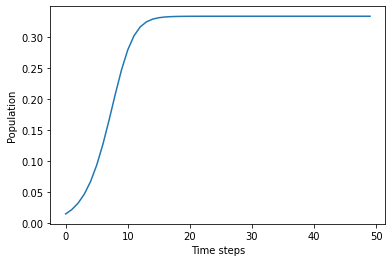

In [4]:
plt.plot(population)
plt.xlabel('Time steps')
plt.ylabel('Population');

We define a function to record the final population at the last two steps.

In [6]:
def final_population(x0, r, n_steps):
    x = x0
    for _ in range(n_steps):
        x = logistic_map(x, r)    
    return [x, logistic_map(x, r)]

We run an experiment to explore what number the population will reach for different growth rates.

In [13]:
n_runs = 1000
n_steps = 1000
r_range = (0, 4)
x0 = 0.01

growth_rate = np.zeros(n_runs*2)
population = np.zeros(n_runs*2)

j = 0
for r in np.linspace(*r_range, n_runs):
    growth_rate[j:j+2] = [r, r]
    population[j:j+2] = final_population(x0, r, n_steps)
    j += 2

The results show a simple relationship for low growth rates that later becomes chaotic.

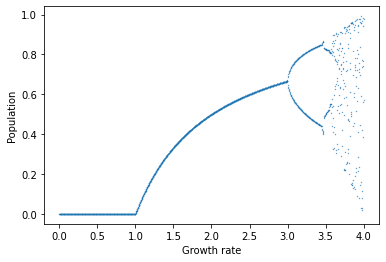

In [14]:
plt.scatter(growth_rate, population, s=0.1)
plt.xlabel('Growth rate')
plt.ylabel('Population');

To learn more about this surprising result: 

- https://en.wikipedia.org/wiki/Logistic_map
- https://www.youtube.com/watch?v=ovJcsL7vyrk